<a href="https://colab.research.google.com/github/johnnycleiton07/image-processing/blob/main/pseudocolor_applications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

#**PROCESSAMENTO DE IMAGENS COLORIDAS**

## Processamento Digital de Imagens

Ciência da Computação 


</center>


# Fundamentos de Imagens Coloridas

* É de conhecimento científico que as cores percebidas pelos seres humanos em um objeto são determinadas pela natureza da luz refletida por ele. Logo, os seres humanos são capazes de discernir milhares de tons e intensidades de cor, em comparação com apenas duas dúzias de tons de cinza.

  > Com isso, sabemos que a cor é um poderoso descritor que muitas vezes simplifica a identificação do objeto e sua extração de uma cena. 

* As operações no processamento de imagens em cores são divididas em duas áreas:
  - _Processamento de Imagens Coloridas_
  - _Processamento de Imagens em Pseudocores_




### Manipulação de Imagens Coloridas em Python

In [44]:
#acessando arquivos no google drive
from google.colab import drive
drive.mount('/content/drive')

#importando as bibliotecas
import cv2
import cv2 as cv
import numpy as np
from skimage import io
from copy import deepcopy
from matplotlib import pyplot as plt
from matplotlib import image as img
from google.colab.patches import cv2_imshow

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


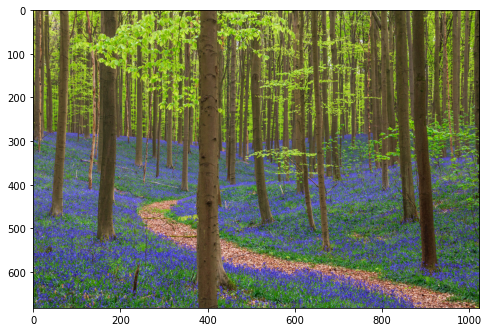

In [2]:
#leitura da imagem em cores rgb
image_path = "/content/drive/MyDrive/Colab Notebooks/images/"

plt.rcParams["figure.figsize"] = (8,8)

color_image = img.imread(image_path + "floresta_hallerbos.jpg")
plt.imshow(color_image)
plt.show()



---


### **Modelo RGB de cores**

* O olho humano possui visão tricromática, ou seja, contém três canais que transmitem informação de cor que podem ser percebidas conforme a luz é refletida. 
  
  Dentre todos os sensores existentes no sistema visual humano: 
  - 65% são sensíveis a **luz vermelha** 
  - 33% são sensíveis a **luz verde**
  - 2% são sensíveis a **luz azul**

* Essa característica da visão humana serviu de base na criação do modelo RGB que assume o vermelho, verde e azul como cores aditivas que combinadas podem reproduzir um largo espectro cromático, assim como na visão humana.

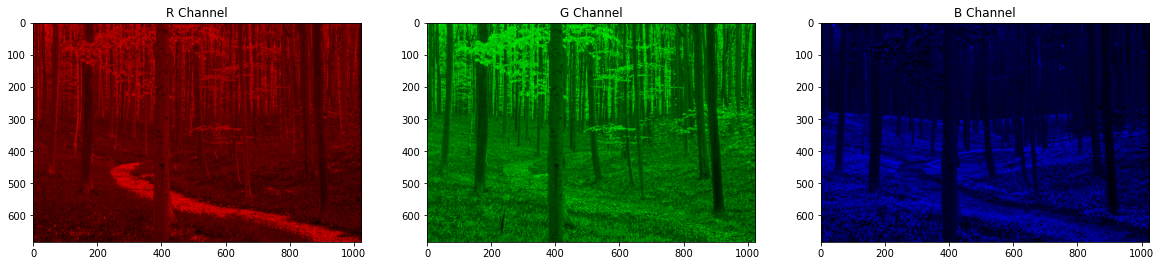

In [3]:
#plotagem dos canais da imagem em rgb
r = deepcopy(color_image)
g = deepcopy(color_image)
b = deepcopy(color_image)

r[:,:,1] = 0; r[:,:,2] = 0; g[:,:,0] = 0; g[:,:,2] = 0; b[:,:,0] = 0; b[:,:,1] = 0

f, (red, green, blue) = plt.subplots(1, 3, figsize = (20,10))

red.set_title('R Channel'); red.imshow(r)
green.set_title('G Channel'); green.imshow(g)
blue.set_title('B Channel'); blue.imshow(b)
plt.show()

* Pode-se considerar que uma imagem colorida é a composição de três imagens em tons de cinza que possuem informações dos três principais canais de cores:

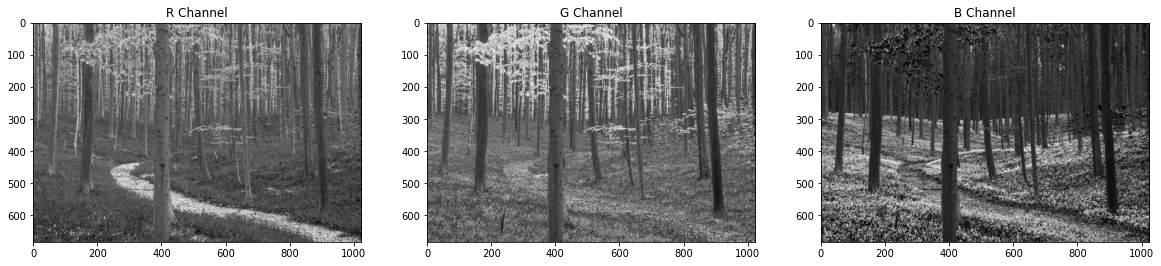

In [4]:
#plotagem dos canais da imagem rgb em tons de cinza
r = color_image[:,:,0]; g = color_image[:,:,1]; b = color_image[:,:,2]

f, (red, green, blue) = plt.subplots(1, 3, figsize = (20,10))

red.set_title('R Channel'); red.imshow(r, cmap='gray')
green.set_title('G Channel'); green.imshow(g, cmap='gray')
blue.set_title('B Channel'); blue.imshow(b, cmap='gray')
plt.show()



---

#### **RGB no OpenCV**

Ao trabalhar com a biblioteca OpenCv, os valores RGB são interpretados como _"BGR"_, sendo as mesmas cores porém em ordem diferente.

* Uma possível solução é utilizar o método "cv2.cvtColor" para converter _BGR_ para RGB, como mostrado abaixo:

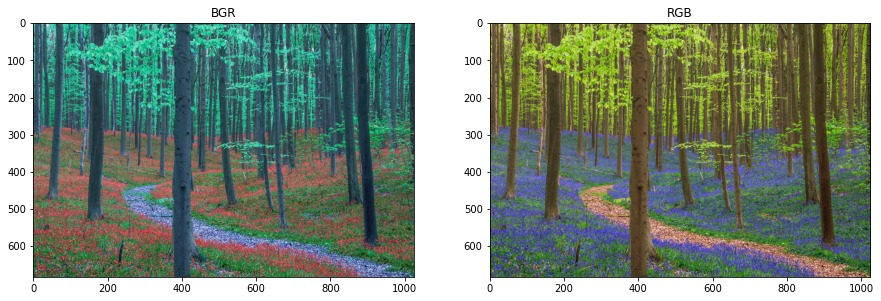

In [6]:
#observe que "cv2.imread" é utilizado para ler a imagem
color_image_bgr = cv2.imread(image_path + "floresta_hallerbos.jpg")

#a correção é utilizando o método "cv2.cvtColor"
color_image_rgb = cv2.cvtColor(color_image_bgr, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(15, 6))

plt.subplot(1,2,1); (plt.imshow(color_image_bgr)); plt.title("BGR")
plt.subplot(1,2,2); (plt.imshow(color_image_rgb)); plt.title("RGB")
plt.show()



---



### **Histograma da Imagem**

* Um histograma é um gráfico que representa a distribuição dos valores dos pixels de uma imagem. A intensidade em um histograma pode ser conferida observando a distribuição de $0$ a $255$, onde os pixels mais escuros ficam próximos de $0$ e os pixels mais claros ficam próximos de $255$.

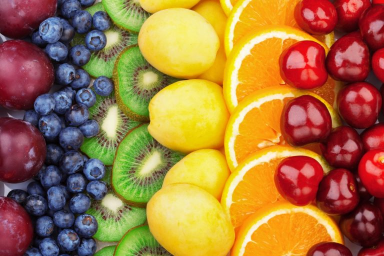

In [7]:
#leitura da imagem exemplo para o histograma
img = cv.imread(image_path + "fruits.jpg")
cv2_imshow(cv.resize(img, None, fx=.5, fy=.5))

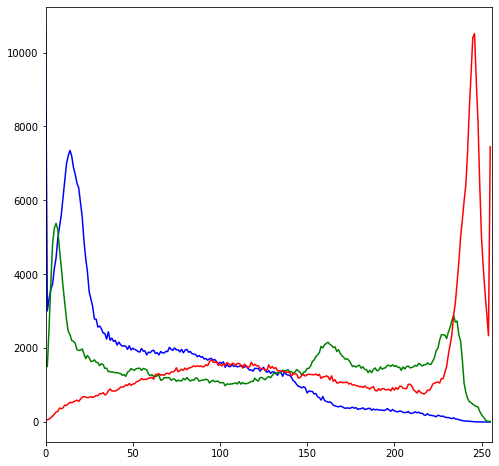

In [8]:
#leitura do histograma com a distribuição dos três canais de cores
color = ('b', 'g', 'r')

for i, col in enumerate(color):
  histograma = cv.calcHist([img], [i], None, [256], [0,256]) #níveis de intensidade no intervalo [0, L - 1]
  plt.plot(histograma, color = col)
  plt.xlim([0,256])

plt.show()

* O eixo $x$ do gráfico normalmente possui uma distribuição de $0$ a $255$, demonstrando o valor de intensidade do pixel. Já no eixo $y$ do gráfico é plotada a quantidade de pixels da imagem com aquela intensidade.



---


# **Pseudocores**

* O processamento de imagens em pseudocores (**falsas cores**) se refere à atribuição de uma cor a uma intensidade monocromática específica, ou a uma faixa de intensidades. Sua principal utilização é na visualização e interpretação humana de eventos, em tons de cinza, em uma imagem ou sequência de imagens.

**Exemplos de uso:**

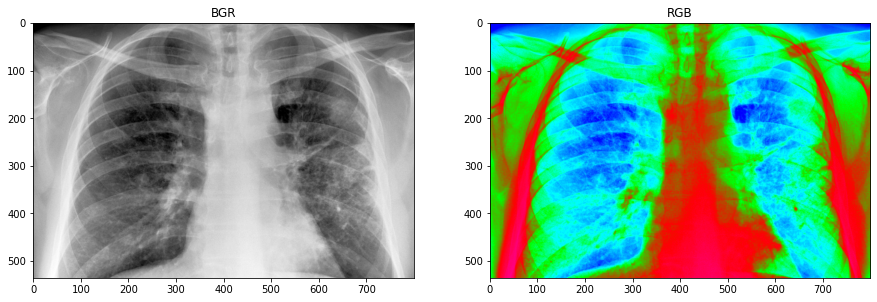

In [46]:
#imagem de raio-x de pulmão para identificar existência de tumor
gray_image = cv.cvtColor(io.imread(image_path + "raiox1.jpg"), cv.COLOR_RGB2GRAY)
pseudocolor = cv2.applyColorMap(gray_image, cv2.COLORMAP_RAINBOW)

fig = plt.figure(figsize=(15, 6))

plt.subplot(1,2,1); (plt.imshow(gray_image, 'gray')); plt.title("BGR")
plt.subplot(1,2,2); (plt.imshow(pseudocolor, 'hsv')); plt.title("RGB")
plt.show()

* Note que a adição de pseudocores mapeia cada valor de intensidade dos pixels em escala de cinza para cores chamativas. Esse método é muito útil para a análise manual de imagens, pois evidencia áreas de tonalidades semelhantes, sendo mais fácil identificar algo fora do comum.


---



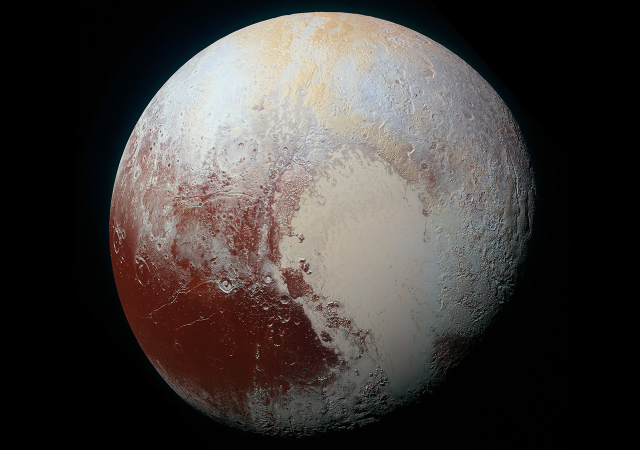

In [9]:
#imagem do planeta anão Plutão
image = cv.cvtColor(io.imread(image_path + "pluto.jpg"), cv.COLOR_BGR2RGB)
cv2_imshow(cv.resize(image, None, fx=.5, fy=.5))

* A imagem de Plutão acima foi divulgada em 2015 pela NASA. Foi a primeira imagem divulgada em cores e em alta definição do planeta anão. Porém, a cor é fantasiosa e foi adicionada graças ao processamento em pseudocores.

  **OBS:** Óbviamente, existem fatos científicos que justificam a escolha das cores que representam plutão, assim como acontece com os outros planetas.

* Conversão da imagem para outros tons de falsas cores:

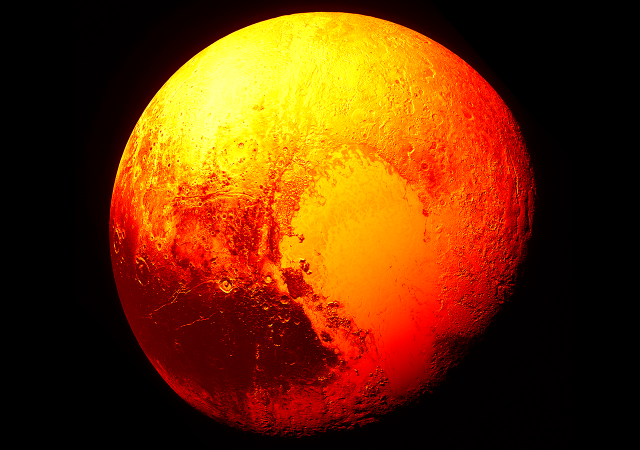

In [47]:
#primeiro converte a imagem para escala de cinza
gray_image = cv.cvtColor(io.imread(image_path + "pluto.jpg"), cv.COLOR_RGB2GRAY)

#adicionando pseudocores quentes
pseudocolor_hot = cv2.applyColorMap(gray_image, cv2.COLORMAP_HOT)
cv2_imshow(cv.resize(pseudocolor_hot, None, fx=.5, fy=.5))

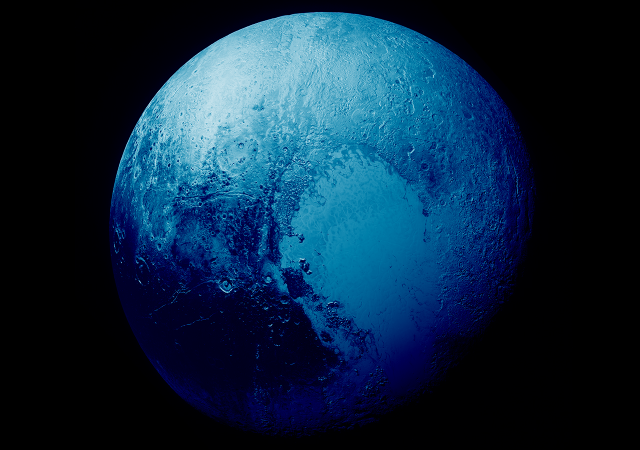

In [16]:
#adicionando pseudocores frias
pseudocolor_cold = cv2.applyColorMap(gray_image, cv2.COLORMAP_OCEAN)
cv2_imshow(cv.resize(pseudocolor_cold, None, fx=.5, fy=.5))



---


>  Outros usos práticos de pseudocores em imagens:
  - salientar explosivos em bagagens registradas por _raio x_ em aeroportos;
  - colorir um mapa com cores simbolicas para indicar alteração de clima;
  - visualização colorida de organismos capturados por microscópios monocromáticos. 



---

# Bibliografia

- GONZALEZ, Rafael C.; WOODS, Richard E. Processamento de imagens digitais. Editora Blucher, 2000

- https://sites.google.com/arapiraca.ufal.br/tacito-neves-ufal/home?authuser=0

- https://professor.luzerna.ifc.edu.br/ricardo-antonello/wp-content/uploads/sites/8/2017/02/Livro-Introdução-a-Visão-Computacional-com-Python-e-OpenCV.pdf

- https://learnopencv.com/applycolormap-for-pseudocoloring-in-opencv-c-python/